<a href="https://colab.research.google.com/github/dopedud/COMP3217-CW2/blob/main/source_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COMP3217 COURSEWORK 2

## Import Modules

In [25]:
import numpy as np
import pandas as pd

### Upload and Read Files

In [26]:
# from google.colab import files
# uploaded = files.upload()

# read from uploaded files
binary_dataset_training = pd.read_csv('TrainingDataBinary.csv')
binary_X_testing = pd.read_csv('TestingDataBinary.csv')

## Data Pre-processing

### Separate Features and Labels

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# split dataset to X training and Y training
binary_X_training = binary_dataset_training.iloc[:, :-1]
binary_Y_training = binary_dataset_training.iloc[:, -1]

### Data Composition

In [28]:
binary_dataset_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Columns: 129 entries, R1-PA1:VH to marker
dtypes: float64(129)
memory usage: 5.9 MB


In [29]:
binary_dataset_training.describe()

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4,marker
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,...,6000.0,6000.00000,6000.00000,6000.00000,6000.00000,6000.0,6000.0,6000.0,6000.0,6000.000000
mean,-5.202654,131234.652733,-7.046442,131354.068362,-2.883982,131643.033619,-5.208205,395.619562,-8.830131,393.325834,...,0.0,0.00100,0.00100,0.00100,0.00100,0.0,0.0,0.0,0.0,0.500000
std,102.007816,5745.200620,103.614201,1523.247980,104.973394,1631.541917,101.946391,123.451995,103.598504,81.175502,...,0.0,0.03161,0.03161,0.03161,0.03161,0.0,0.0,0.0,0.0,0.500042
min,-179.822804,30238.363620,-179.020663,109269.310700,-179.868641,106034.858800,-179.828534,5.310190,-179.559243,6.042630,...,0.0,0.00000,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.0,0.000000
25%,-102.850222,131158.275400,-102.474934,130857.396100,-100.273344,131208.421900,-101.115592,321.541160,-104.062027,325.203360,...,0.0,0.00000,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.0,0.000000
50%,-9.293375,131634.667500,-2.480907,131358.861500,-7.015868,131684.814000,-7.955519,394.968270,-6.505936,399.546020,...,0.0,0.00000,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.0,0.500000
75%,74.531782,132060.913100,90.395551,131860.326900,88.338633,132136.132900,73.577808,452.281700,87.636760,455.806567,...,0.0,0.00000,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.0,1.000000
max,179.215469,138579.963300,179.960314,138304.157300,179.960314,138630.109800,179.662376,1760.236430,179.920207,1094.265360,...,0.0,1.00000,1.00000,1.00000,1.00000,0.0,0.0,0.0,0.0,1.000000


marker
0.0    3000
1.0    3000
Name: count, dtype: int64


<Axes: >

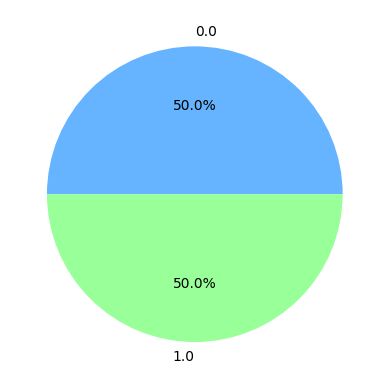

In [30]:
print(binary_Y_training.value_counts())

binary_Y_training.value_counts().plot(kind = 'pie', title = '', ylabel = '', autopct = '%1.1f%%', colors = ['#66b3ff','#99ff99', '#fcad27'])

### Standardising Data

In [31]:
# scale data on training set, then transform dataset from training set and testing set
scaler = StandardScaler()
binary_X_training = scaler.fit_transform(binary_X_training)
binary_X_training = pd.DataFrame(binary_X_training)
binary_X_testing = scaler.transform(binary_X_testing)
binary_X_testing = pd.DataFrame(binary_X_testing)

### Setup Validation Set

In [32]:
# further split dataset to training set and validation set
binary_X_training, binary_X_validation, binary_Y_training, binary_Y_validation = train_test_split(
    binary_X_training, binary_Y_training, test_size = .2, random_state = 42
)

## ML Training

In [33]:
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier

# EDIT PARAMETERS HERE
parameter_grid_binary = {
    'n_estimators'      : [50, 100, 150, 200],
    'criterion'         : ['gini', 'entropy', 'log_loss'],
    'min_samples_split' : [2, 5, 10]
}

# RandomForest classifier is used to predict validation and test set
grid_search_binary = GridSearchCV(estimator = RandomForestClassifier(random_state = 42), param_grid = parameter_grid_binary, scoring = 'f1_macro', cv = 10, n_jobs = 3, verbose = 2)
grid_search_binary.fit(binary_X_training, binary_Y_training)

print("Best hyperparameters: ", grid_search_binary.best_params_)

Fitting 10 folds for each of 36 candidates, totalling 360 fits
Best hyperparameters:  {'criterion': 'entropy', 'min_samples_split': 2, 'n_estimators': 150}


## Training Evaluation

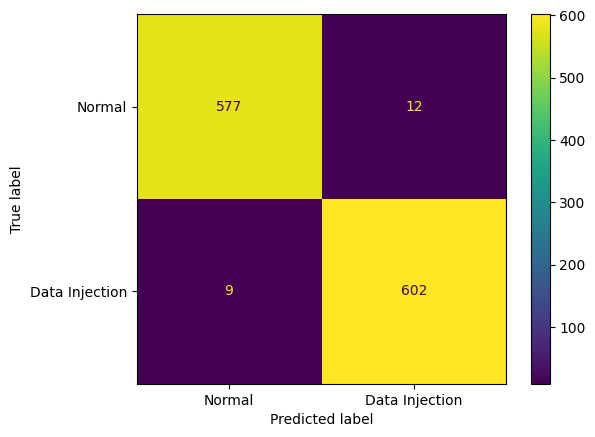


Accuracy score: 0.983
F1-score: 0.983

Precision score: 0.980
Recall score: 0.985

                precision    recall  f1-score   support

        Normal       0.98      0.98      0.98       589
Data Injection       0.98      0.99      0.98       611

      accuracy                           0.98      1200
     macro avg       0.98      0.98      0.98      1200
  weighted avg       0.98      0.98      0.98      1200




In [34]:
import matplotlib.pyplot as plt

from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
)

# method to print classification metrics as well as generate a confusion matrix
# display from testing on validation set
def print_metrics(Y_test, predicted, labels):
    ConfusionMatrixDisplay(confusion_matrix(Y_test, predicted), display_labels = labels).plot()

    plt.show()

    print()

    print("Accuracy score: %.3f" % accuracy_score(Y_test, predicted))

    if (len(labels) > 2):
        print("F1-score: %.3f" % f1_score(Y_test, predicted, average = 'macro'))

        print()

        print("Precision score: %.3f" % precision_score(Y_test, predicted, average = 'macro'))
        print("Recall score: %.3f" % recall_score(Y_test, predicted, average = 'macro'))

    else:
        print("F1-score: %.3f" % f1_score(Y_test, predicted))

        print()

        print("Precision score: %.3f" % precision_score(Y_test, predicted))
        print("Recall score: %.3f" % recall_score(Y_test, predicted))

    print()

    print(classification_report(Y_test, predicted, target_names = labels))

    print()

print_metrics(binary_Y_training, grid_search_binary.predict(binary_X_training), ['Normal', 'Data Injection'])

## Output Test Set

In [35]:
# output prediction on test set
output_data = pd.read_csv('TestingDataBinary.csv')
binary_Y_testing = grid_search_binary.predict(binary_X_testing)
output_data.join(pd.DataFrame(binary_Y_testing, columns = ['marker'])).to_csv('TestingResultsBinary.csv', index = False)